In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

states = 5

In [2]:
# read file created in MARCC
unadjusted_energies = pd.read_csv("allenergies.csv", header = None)
unadjusted_energies

,0,1,2,3,4,5
0,69,-256.194402,-256.160215,-256.133550,-256.115682,-256.107142
1,34,-256.196044,-256.165919,-256.124143,-256.111289,-256.099265
2,37,-256.196106,-256.165591,-256.125130,-256.111590,-256.100351
3,85,-256.191918,-256.156207,-256.136301,-256.118946,-256.106618
4,80,-256.192812,-256.157557,-256.135547,-256.117911,-256.106992
...,...,...,...,...,...,...
115,10,-256.194191,-256.167490,-256.115037,-256.108137,-256.089080
116,8,-256.193928,-256.167537,-256.114181,-256.107796,-256.088129
117,18,-256.195077,-256.167174,-256.118311,-256.109370,-256.092737
118,66,-256.194747,-256.160867,-256.132926,-256.115125,-256.106983


In [3]:
# find minimum energy
minimum_energy = unadjusted_energies[1].min()
print('Minimum energy: ' + str(minimum_energy))

# subtract the lowest energy from all energy values
# and add adjusted energies to a dataset
# and convert to eV
conversion = 27.211386246 # eV per hartree
energies = pd.DataFrame()
energies[0] = unadjusted_energies[0]
for i in range(states):
    energies[i + 1] = unadjusted_energies[i + 1].subtract(minimum_energy)*conversion
energies

Minimum energy: -256.196130145


,0,1,2,3,4,5
0,69,0.047012,0.977294,1.702880,2.189110,2.421484
1,34,0.002336,0.822086,1.958870,2.308638,2.635841
2,37,0.000653,0.831022,1.932016,2.300464,2.606292
3,85,0.114615,1.086355,1.628023,2.100287,2.435752
4,80,0.090285,1.049633,1.648538,2.128452,2.425561
...,...,...,...,...,...,...
115,10,0.052758,0.779327,2.206667,2.394427,2.912989
116,8,0.059917,0.778046,2.229961,2.403705,2.938863
117,18,0.028663,0.787943,2.117561,2.360877,2.813482
118,66,0.037649,0.959558,1.719885,2.204251,2.425816


In [4]:
energies = energies.sort_values(by = 0)
energies

,0,1,2,3,4,5
71,0,0.093096,0.776402,2.327204,2.444568,3.046171
57,1,0.088552,0.776304,2.314693,2.439126,3.032430
43,2,0.084121,0.776292,2.302283,2.433780,3.018781
24,3,0.079803,0.776368,2.289975,2.428531,3.005226
56,4,0.075599,0.776530,2.277768,2.423377,2.991764
...,...,...,...,...,...,...
52,115,0.322278,1.358793,1.560893,1.958221,2.573454
67,116,0.331035,1.369456,1.560336,1.954641,2.579996
87,117,0.339911,1.380223,1.559890,1.951147,2.586656
104,118,0.348907,1.391096,1.559554,1.947740,2.593433


<IPython.core.display.Javascript object>


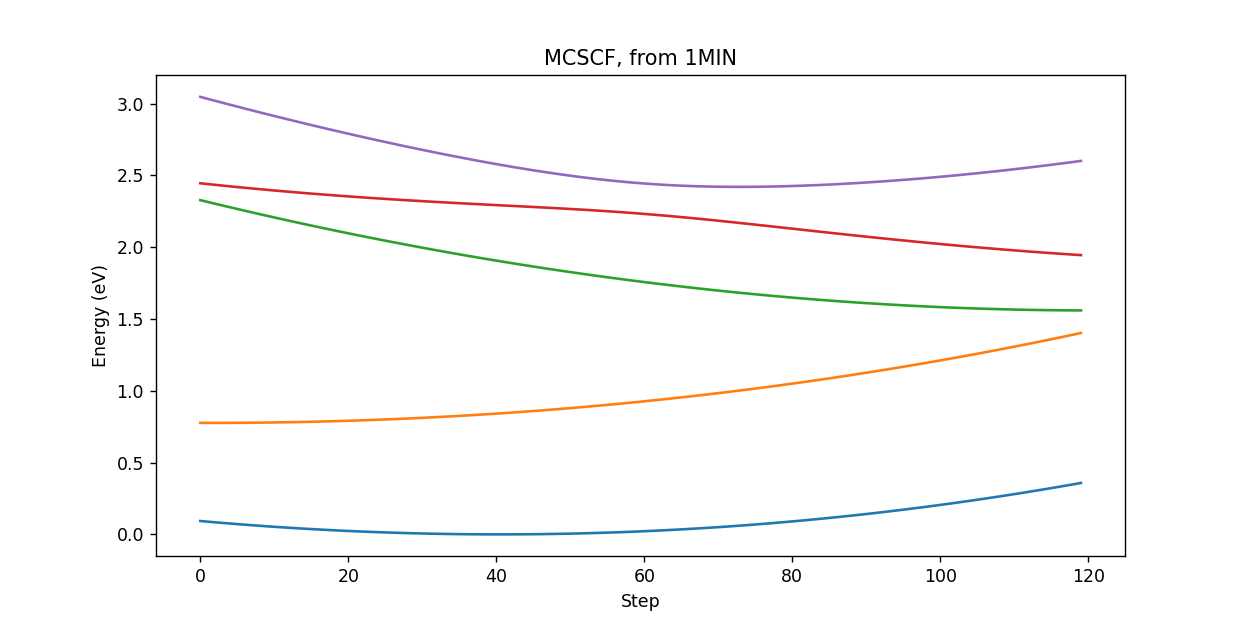

In [5]:
%matplotlib notebook

plt.figure(figsize=(10,5))
for i in range(states):
    #plt.scatter(energies[0], energies[i+1], s = 15, linewidths = 0.5, edgecolors = 'w', label = str(i + 1))
    #plt.ylim(-0.1,3.1)
    #plt.xlim(0,3.3)
    plt.title("MCSCF, from 1MIN")
    plt.xlabel('Step')
    plt.ylabel('Energy (eV)')
    plt.plot(energies[0], energies[i+1], label = str(i + 1))